In [1]:
import glob
import pandas as pd
import numpy as np
import mne
import yasa
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1.2)

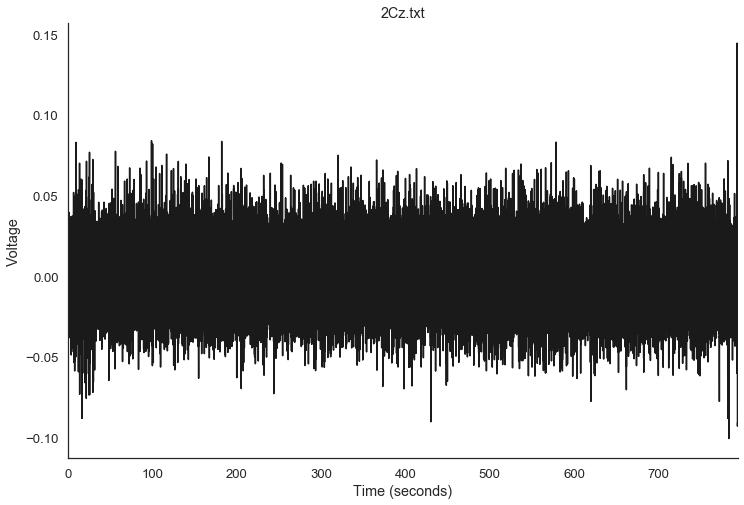

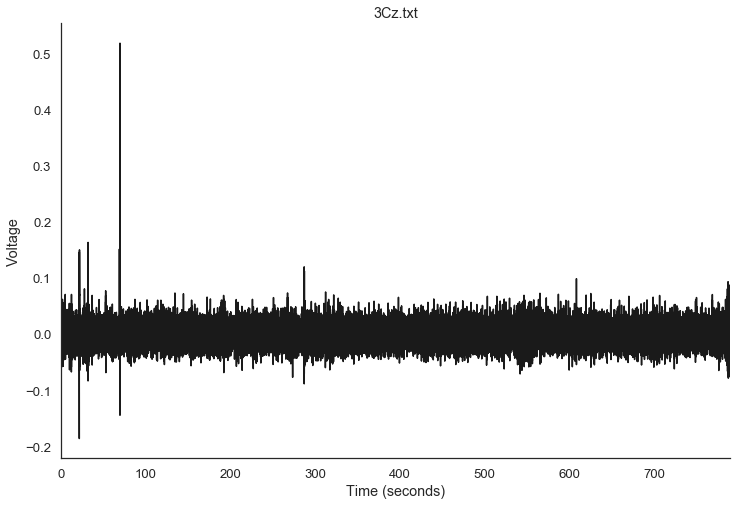

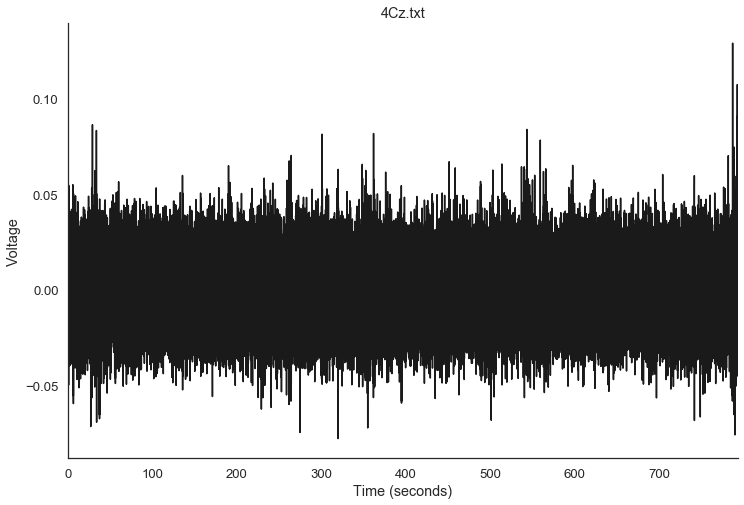

In [10]:
filenames = sorted(glob.glob('*.txt'))
for f in filenames:
        
    data = np.loadtxt(fname=f)
    data = scipy.signal.decimate(data,2)
    passband_frequencies = (0.5, 45.0) 
    sf = 500.
    time = np.arange(data.size) / sf
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.plot(time, data, lw=1.5, color='k')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Voltage')
    plt.xlim([time.min(), time.max()])
    plt.title(f)
    sns.despine()
    plt.savefig(f + "signal.jpg")
  
    

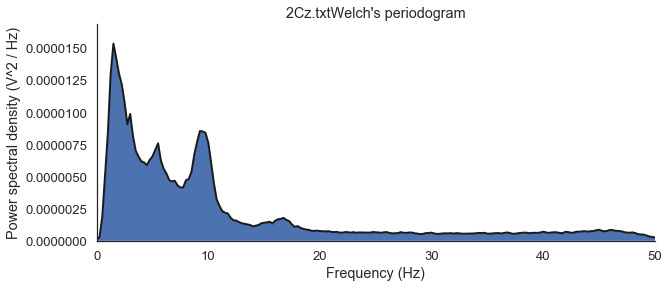

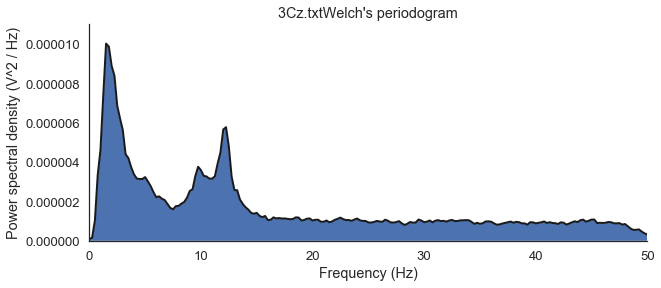

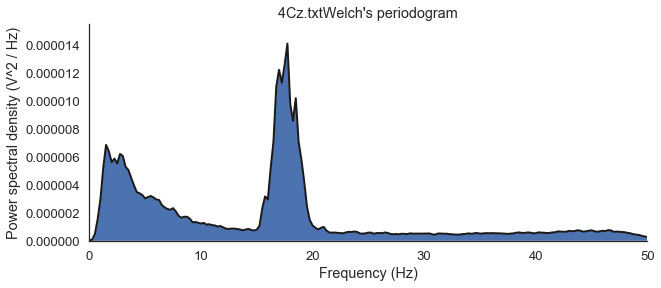

In [11]:
filenames = sorted(glob.glob('*.txt'))
for f in filenames:
        
    data = np.loadtxt(fname=f)
    data = scipy.signal.decimate(data,2)
    passband_frequencies = (0.5, 45.0)
    sf = 500.
    time = np.arange(data.size) / sf
    
    
    win = 4 * sf
    freqs, psd = signal.welch(data, sf, nperseg=win, scaling='spectrum')

    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.fill_between(freqs, psd, cmap='Spectral')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title(f + "Welch's periodogram")
    plt.xlim([0, 50])
    sns.despine()
    plt.savefig(f + "_welch.jpg")
    

In [12]:
filenames = sorted(glob.glob('*.txt'))
for f in filenames:
        
    data = np.loadtxt(fname=f)
    data = scipy.signal.decimate(data,2)
    passband_frequencies = (0.5, 45.0)
    sf = 500.
    time = np.arange(data.size) / sf
    
   
    win = 4 * sf
    freqs, psd = signal.welch(data, sf, nperseg=win, scaling='spectrum')

    bands = (yasa.bandpower_from_psd(psd, freqs)) 
    df = pd.DataFrame(bands)
    df.to_csv(f + 'bands.csv')
    
   

    